In [1]:
from helpers import *

In [23]:
initial_power = 49 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer=1 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

In [24]:
print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

3879.36034722613Hz
1.29394674177543 uK


<IPython.core.display.Math object>

In [56]:
eta_target = 9

waist = trap.subs(
    sp.solve(
        trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer() - eta_target,
        trap.waist_tweezer,
    )[0]
).evalf()

display(
    Math(
        f"{sp.latex(trap.waist_tweezer)}\\left({_aspect_ratio_latex} = {eta_target}\\right)"
        f" = {waist/si.um:.2f}\\mathrm{{\\mu m}}"
    )
)

<IPython.core.display.Math object>

In [5]:
aspect_ratio

sqrt(2)*pi*W_t/lambda

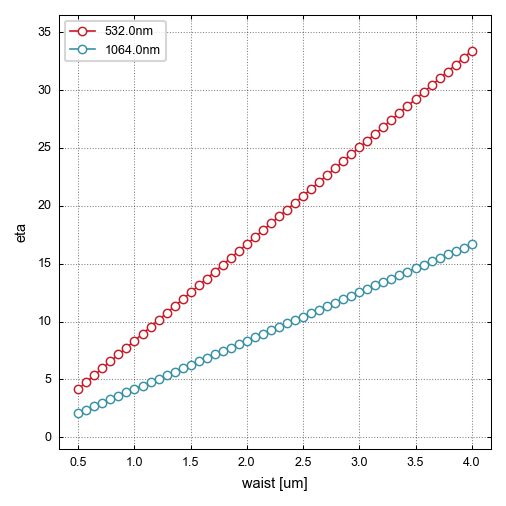

In [8]:
wvls = np.array([532, 1064]) * si.nm
waists = np.linspace(0.5,4) * si.um

for i, wvl in enumerate(wvls):
    eta = np.sqrt(2)*np.pi * waists/wvl
    plt.plot(waists/si.um,eta,label=f"{wvl/si.nm}nm")

plt.ylabel("eta")
plt.xlabel("waist [um]")
plt.grid()
plt.legend()
plt.show()

----------------

In [4]:
initial_power = 120 * si.uW 
initial_grad = 5.3 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer=1 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

6070.8947739052155Hz
3.16884916353168 uK


<IPython.core.display.Math object>

[5.20695434e+19 4.40731577e+14 2.01595102e+10 2.50518338e+06
 7.34954500e+02 5.26538585e-01 1.34245312e-03] s
-8.103227737230478e-30


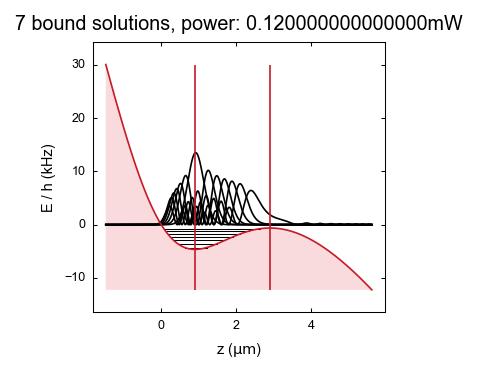

In [39]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,50,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-1,state_mult=1e3)

  0%|          | 0/50 [00:00<?, ?it/s]

 86%|████████▌ | 43/50 [00:21<00:03,  1.94it/s]<lambdifygenerated-1982>:2: RuntimeWarning: overflow encountered in scalar power
  return 1.89546959323095e-40*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 7.55144813585406e-24
<lambdifygenerated-1983>:2: RuntimeWarning: overflow encountered in scalar power
  return -7.58187837292378e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 1.89546959323095e-40/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
c:\Users\peter\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_root_scalar.py:326: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=fprime2, **kwargs)
<lambdifygenerated-1984>:2: RuntimeWarning: overflow encountered in scalar power
  return 4.54912702375427e-39*z**3/(pi**7*(z**2/pi**2 + 8.83317315846006e-13)**4) - 2.27456351187713e-39*z/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3)
<lambdifygenerated-1983>:2: RuntimeWarning: invalid value encountered in scalar divide
  ret

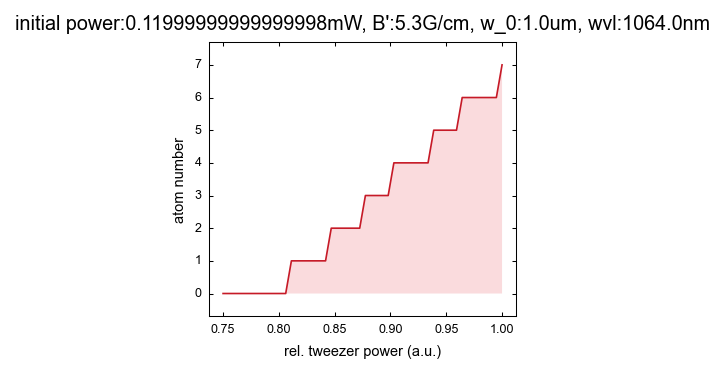

In [40]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,50,-0.5*zr,1.9*zr,power_fac_down=0.75,power_fac_up=1,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=0*si.ms)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:40<00:00,  2.02s/it]


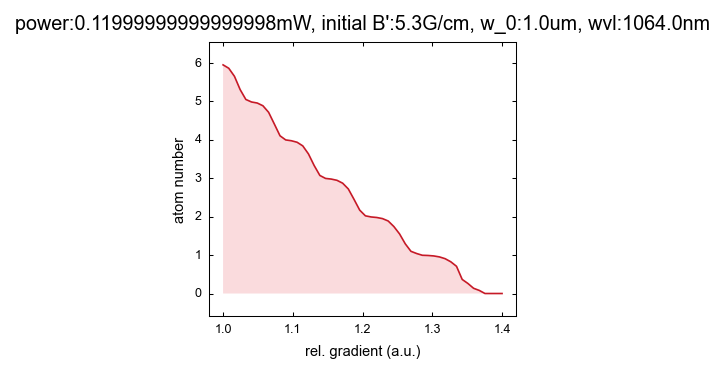

In [44]:
trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = initial_grad
plot_occupation_grad(trap,100,-0.15*zr,1.9*zr,grad_fac_down=1.4,grad_fac_up=1,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=25*si.ms)

  0%|          | 0/50 [00:00<?, ?it/s]

 92%|█████████▏| 46/50 [01:19<00:00,  4.03it/s]<lambdifygenerated-387>:2: RuntimeWarning: overflow encountered in scalar power
  return -1.21409163487995e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 3.03522908719988e-41/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
c:\Users\peter\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_root_scalar.py:326: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=fprime2, **kwargs)
<lambdifygenerated-388>:2: RuntimeWarning: overflow encountered in scalar power
  return 7.28454980927971e-40*z**3/(pi**7*(z**2/pi**2 + 8.83317315846006e-13)**4) - 3.64227490463986e-40*z/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3)
<lambdifygenerated-386>:2: RuntimeWarning: overflow encountered in scalar power
  return 3.03522908719988e-41*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 1.21521695321431e-24
<lambdifygenerated-387>:2: RuntimeWarning: invalid value encountered in scalar divide
  return 

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

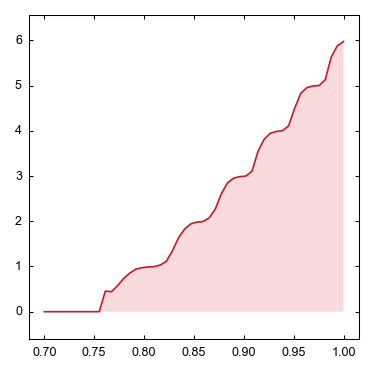

In [4]:
initial_grad = -2.2 * si.G / si.cm

trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = initial_grad
plot_occupation_grad(trap,100,-0.15*zr,1.9*zr,grad_fac_down=0.7,grad_fac_up=1,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=25*si.ms)

In [45]:
trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = initial_grad

params = np.array([float(trap.subs(trap.wvl)), float(trap.subs(trap.waist_tweezer)), float(trap.subs(trap.power_tweezer)), float(trap.subs(trap.grad_z)), float(trap.subs(aspect_ratio)), float(trap.subs(trap.get_omega_ax_tweezer())), float(trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK)])

with open('stepsizes.txt', 'a') as file:
    file.write("\n"+','.join(map(str, params)) + ',0.0271')


----------------

  0%|          | 0/100 [00:00<?, ?it/s]

 86%|████████▌ | 86/100 [03:05<00:06,  2.14it/s]<lambdifygenerated-1547>:2: RuntimeWarning: overflow encountered in scalar power
  return -7.60340215783404e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 1.90085053945851e-40/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
 87%|████████▋ | 87/100 [03:06<00:06,  2.11it/s]<lambdifygenerated-1551>:2: RuntimeWarning: overflow encountered in scalar power
  return -7.57887505409909e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 1.89471876352477e-40/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
<lambdifygenerated-1552>:2: RuntimeWarning: overflow encountered in scalar power
  return 4.54732503245946e-39*z**3/(pi**7*(z**2/pi**2 + 8.83317315846006e-13)**4) - 2.27366251622973e-39*z/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3)
<lambdifygenerated-1550>:2: RuntimeWarning: overflow encountered in scalar power
  return 1.89471876352477e-40*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 7.55144813585406e-24
<lambdifygenerated

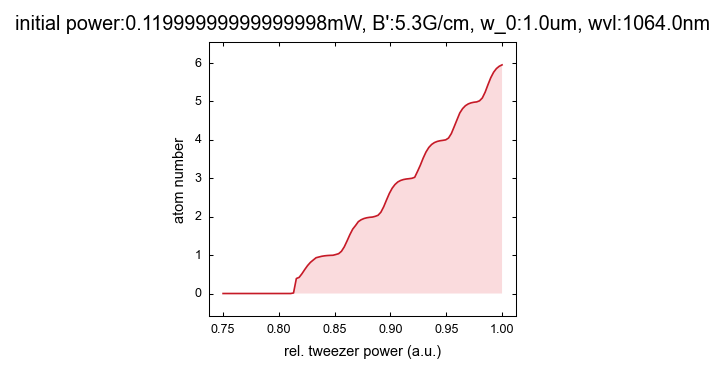

In [65]:
trap[trap.power_tweezer] = initial_power
spill_power_factor, atom_number = plot_occupation(trap,50,-0.5*zr,1.9*zr,power_fac_down=0.75,power_fac_up=1,n_spill_steps=100,n_pot_steps=int(1e3),t_spill=25*si.ms,results=True)

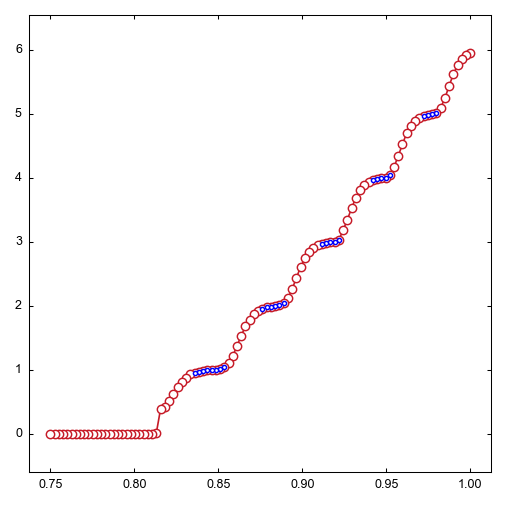

In [66]:
bool_array = np.logical_and(np.abs(atom_number - np.round(atom_number,0)) < 0.05, atom_number > 0.05) #find points where atomnumber is close to integer
bool_array = np.logical_and(bool_array, atom_number < 5.5)
plt.plot(spill_power_factor,atom_number)
plt.plot(spill_power_factor[bool_array],atom_number[bool_array],"b.")

In [67]:
diff = np.diff(bool_array.astype(int))  # Convert to int to use np.diff
start_indices = np.where(diff == 1)[0] + 1  # Indices where blobs start
end_indices = np.where(diff == -1)[0] + 1  # Indices where blobs end

# Special case: handle if the array starts or ends with a True
if bool_array[0]:
    start_indices = np.insert(start_indices, 0, 0)  # Add the start of the array
if bool_array[-1]:
    end_indices = np.append(end_indices, len(bool_array))  # Add the end of the array

#step length
step_len = np.abs(np.mean(np.diff(spill_power_factor)))

# Blob lengths
blob_lengths = np.mean((end_indices - start_indices)*step_len)



# Results
print("Lengths of blobs:", blob_lengths)

Lengths of blobs: 0.014141414141414144


-------------

# Find the power to start at for a given gradient

In [ ]:
from helpers import *

initial_power = 120 * si.uW 
initial_grad = -2 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 2.2 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

285.07206864693904Hz
0.654720901556131 uK


<IPython.core.display.Math object>

[1.48618399e+29 2.22021498e+24 1.48238588e+20 2.15668597e+16
 5.63216075e+12 2.44438384e+09 1.71858255e+06 1.98111053e+03
 3.98652384e+00 1.68872845e-02] s
-1.9011174490670204e-30


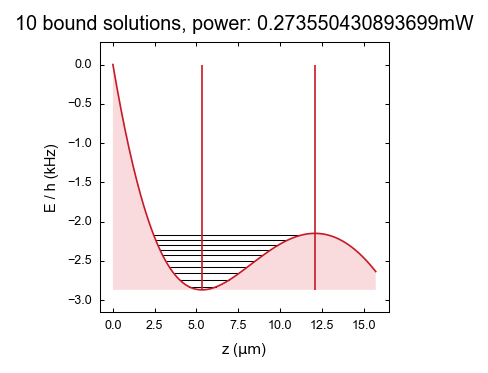

In [17]:
initial_power = 4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * trap.grad_z) * trap.subs(trap.waist_tweezer**2/trap.a)
trap[trap.power_tweezer] = initial_power *1.13
plot_solutions(trap,50,-0.*zr,1.1*zr,n_pot_steps=200,display_plot=-2,state_mult=1e3)

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [07:22<00:00,  2.95s/it]


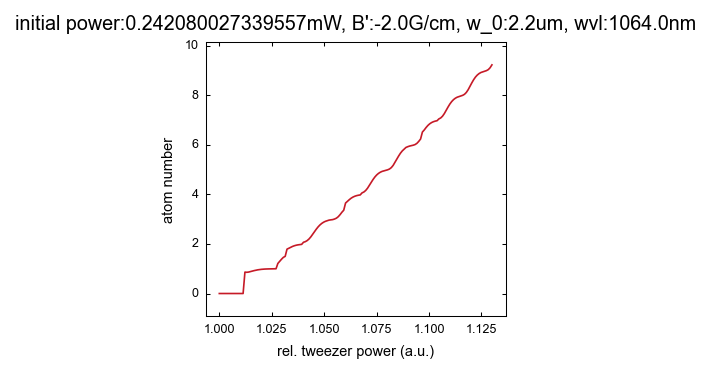

In [19]:
trap[trap.power_tweezer] = initial_power
spill_power_factor, atom_number = plot_occupation(trap,50,-0*zr,1.1*zr,power_fac_down=1,power_fac_up=1.13,n_spill_steps=150,n_pot_steps=int(0.2e3),t_spill=25*si.ms,results=True)

Lengths of blobs: 0.016964951528709922


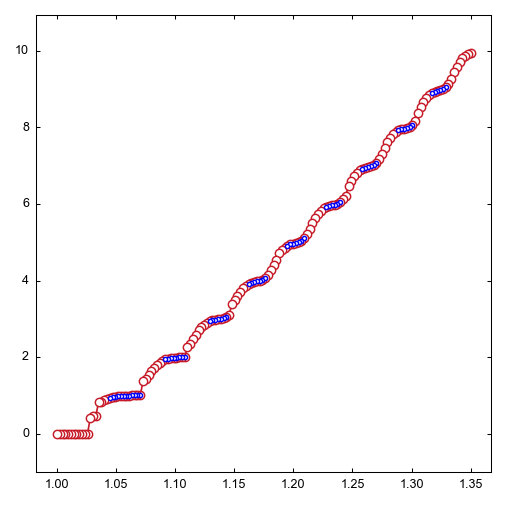

In [36]:
bool_array = np.logical_and(np.abs(atom_number - np.round(atom_number,0)) < 0.1, atom_number > 0.05) #find points where atomnumber is close to integer
bool_array = np.logical_and(bool_array, atom_number < 9.5)
plt.plot(spill_power_factor,atom_number)
plt.plot(spill_power_factor[bool_array],atom_number[bool_array],"b.")

diff = np.diff(bool_array.astype(int))  # Convert to int to use np.diff
start_indices = np.where(diff == 1)[0] + 1  # Indices where blobs start
end_indices = np.where(diff == -1)[0] + 1  # Indices where blobs end

# Special case: handle if the array starts or ends with a True
if bool_array[0]:
    start_indices = np.insert(start_indices, 0, 0)  # Add the start of the array
if bool_array[-1]:
    end_indices = np.append(end_indices, len(bool_array))  # Add the end of the array

#step length
step_len = np.abs(np.mean(np.diff(spill_power_factor)))

# Blob lengths
blob_lengths = np.mean((end_indices - start_indices)*step_len)

# Results
print("Lengths of blobs:", blob_lengths)

# Compare to 532nm

In [27]:
from helpers import *

initial_power = 120 * si.uW 
initial_grad = -2 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 1.08 * si.um,
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

2380.714063424528Hz
2.65195191238491 uK


<IPython.core.display.Math object>

In [26]:
eta_target = 9

waist = trap.subs(
    sp.solve(
        trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer() - eta_target,
        trap.waist_tweezer,
    )[0]
).evalf()

display(
    Math(
        f"{sp.latex(trap.waist_tweezer)}\\left({_aspect_ratio_latex} = {eta_target}\\right)"
        f" = {waist/si.um:.2f}\\mathrm{{\\mu m}}"
    )
)

<IPython.core.display.Math object>

[4.89675243e+35 1.45804684e+30 2.13694506e+25 7.48376755e+20
 5.14048185e+16 6.38561684e+12 1.39036504e+09 5.31676017e+05
 3.70863309e+02 5.25090804e-01 2.21863734e-03] s
-1.5550542503946148e-30


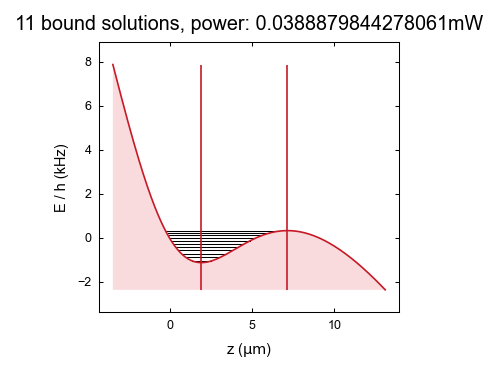

In [31]:
initial_power = 4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * trap.grad_z) * trap.subs(trap.waist_tweezer**2/trap.a)
trap[trap.power_tweezer] = initial_power *1.35
plot_solutions(trap,50,-0.5*zr,1.9*zr,n_pot_steps=200,display_plot=-2,state_mult=1e3)

100%|██████████| 150/150 [07:59<00:00,  3.20s/it]


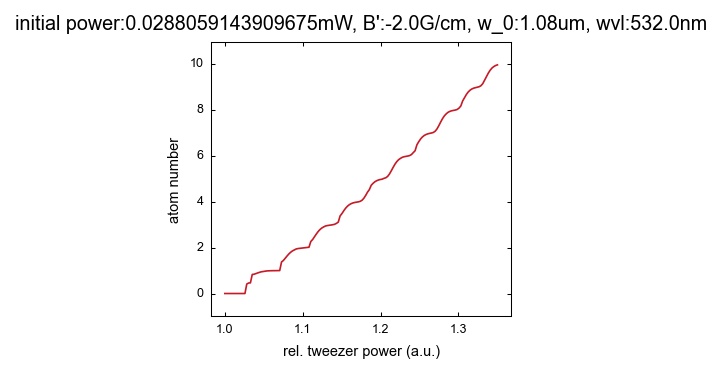

In [32]:
trap[trap.power_tweezer] = initial_power
spill_power_factor, atom_number = plot_occupation(trap,50,-0.5*zr,1.9*zr,power_fac_down=1,power_fac_up=1.35,n_spill_steps=150,n_pot_steps=int(0.2e3),t_spill=25*si.ms,results=True)

Lengths of blobs: 0.016964951528709922


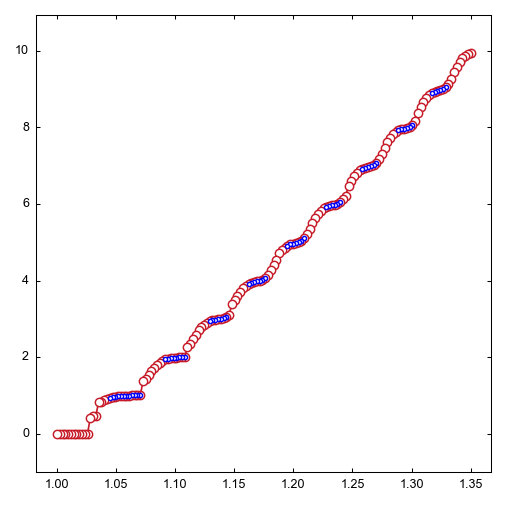

In [33]:
bool_array = np.logical_and(np.abs(atom_number - np.round(atom_number,0)) < 0.10, atom_number > 0.05) #find points where atomnumber is close to integer
bool_array = np.logical_and(bool_array, atom_number < 9.5)
plt.plot(spill_power_factor,atom_number)
plt.plot(spill_power_factor[bool_array],atom_number[bool_array],"b.")

diff = np.diff(bool_array.astype(int))  # Convert to int to use np.diff
start_indices = np.where(diff == 1)[0] + 1  # Indices where blobs start
end_indices = np.where(diff == -1)[0] + 1  # Indices where blobs end

# Special case: handle if the array starts or ends with a True
if bool_array[0]:
    start_indices = np.insert(start_indices, 0, 0)  # Add the start of the array
if bool_array[-1]:
    end_indices = np.append(end_indices, len(bool_array))  # Add the end of the array

#step length
step_len = np.abs(np.mean(np.diff(spill_power_factor)))

# Blob lengths
blob_lengths = np.mean((end_indices - start_indices)*step_len)

# Results
print("Lengths of blobs:", blob_lengths)